datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
train['datetime'] = pd.to_datetime(train['datetime'],format='%Y-%m-%d %H:%M:%S')
test['datetime'] = pd.to_datetime(test['datetime'],format='%Y-%m-%d %H:%M:%S')

In [8]:
train['date'] = train['datetime'].dt.date
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['time'] = train['datetime'].dt.time
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.day_name()

test['date'] = test['datetime'].dt.date
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['time'] = test['datetime'].dt.time
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.day_name()

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,time,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,00:00:00,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,01:00:00,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,02:00:00,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,03:00:00,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,04:00:00,4,Saturday


In [10]:
# column 순서 바꾸기
train=train[['datetime','date','year','month','day','weekday','time','hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']]
test=test[['datetime','date','year','month','day','weekday','time','hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]

In [11]:
train.head()

,datetime,date,year,month,day,weekday,time,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011-01-01,2011,1,1,Saturday,00:00:00,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,2011-01-01,2011,1,1,Saturday,01:00:00,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,2011-01-01,2011,1,1,Saturday,02:00:00,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,2011-01-01,2011,1,1,Saturday,03:00:00,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,2011-01-01,2011,1,1,Saturday,04:00:00,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
# datetime 삭제
train=train.drop(['datetime'],axis=1)
test=test.drop(['datetime'],axis=1)

In [13]:
train.head()

,date,year,month,day,weekday,time,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,2011,1,1,Saturday,00:00:00,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,2011,1,1,Saturday,01:00:00,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,2011,1,1,Saturday,02:00:00,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,2011,1,1,Saturday,03:00:00,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,2011,1,1,Saturday,04:00:00,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
test.head()

,date,year,month,day,weekday,time,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20,2011,1,20,Thursday,00:00:00,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20,2011,1,20,Thursday,01:00:00,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20,2011,1,20,Thursday,02:00:00,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20,2011,1,20,Thursday,03:00:00,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20,2011,1,20,Thursday,04:00:00,4,1,0,1,1,10.66,12.880,56,11.0014


<AxesSubplot:xlabel='hour', ylabel='count'>

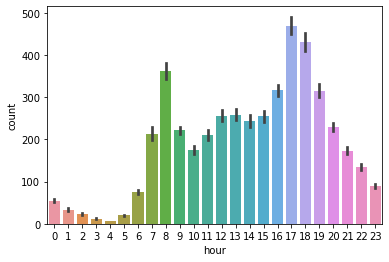

In [15]:
sns.barplot(x="hour",y="count",data=train)

<AxesSubplot:xlabel='season', ylabel='count'>

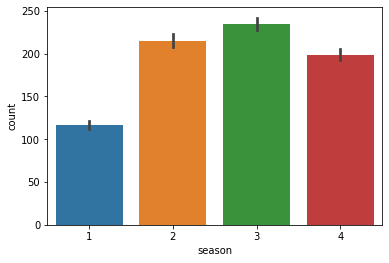

In [16]:
sns.barplot(x="season",y="count",data=train)

<AxesSubplot:xlabel='weather', ylabel='count'>

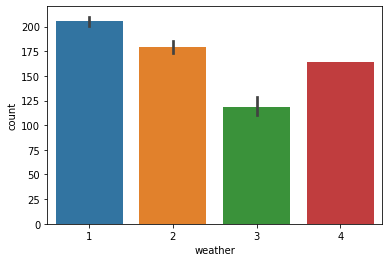

In [17]:
sns.barplot(x="weather",y="count",data=train)

<AxesSubplot:xlabel='workingday', ylabel='count'>

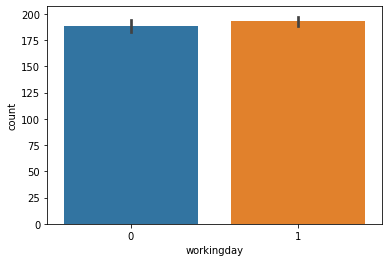

In [18]:
sns.barplot(x="workingday",y="count",data=train)

<AxesSubplot:xlabel='holiday', ylabel='count'>

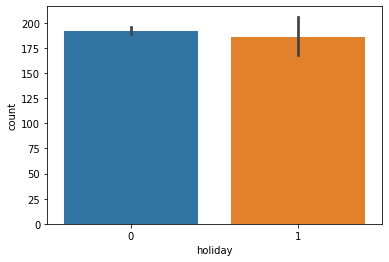

In [19]:
sns.barplot(x="holiday",y="count",data=train)

<AxesSubplot:xlabel='humidity', ylabel='count'>

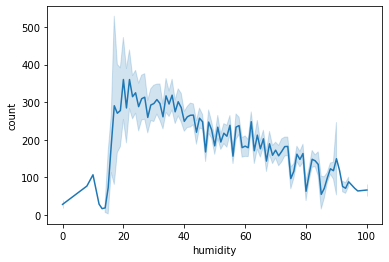

In [20]:
sns.lineplot(x="humidity",y="count",data=train)

<AxesSubplot:xlabel='temp', ylabel='count'>

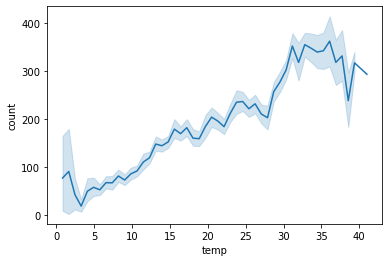

In [21]:
sns.lineplot(x="temp",y="count",data=train)

<AxesSubplot:xlabel='atemp', ylabel='count'>

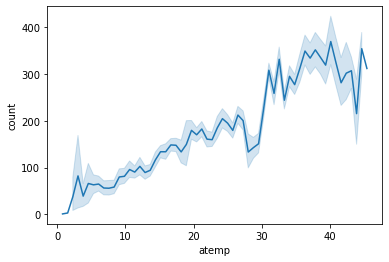

In [22]:
sns.lineplot(x="atemp",y="count",data=train)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

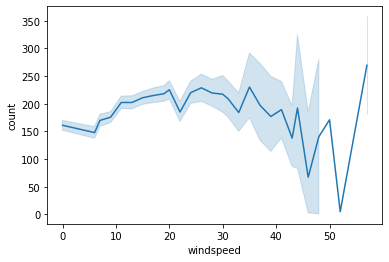

In [23]:
sns.lineplot(x="windspeed",y="count",data=train)

<AxesSubplot:xlabel='day', ylabel='count'>

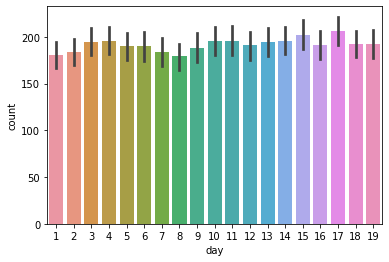

In [24]:
sns.barplot(x="day",y="count",data=train)

<AxesSubplot:xlabel='month', ylabel='count'>

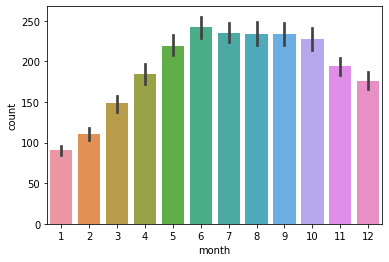

In [25]:
sns.barplot(x="month",y="count",data=train)

<AxesSubplot:xlabel='hour', ylabel='count'>

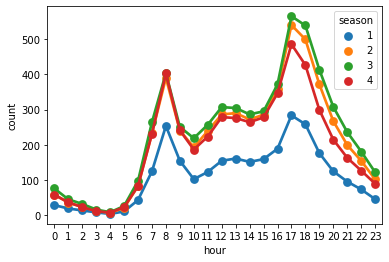

In [26]:
hourAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True)

<AxesSubplot:xlabel='weekday', ylabel='count'>

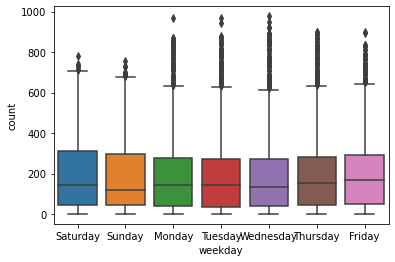

In [27]:
# 요일별 count boxplot 
sns.boxplot(x='weekday',y='count', data=train)

<AxesSubplot:xlabel='year', ylabel='count'>

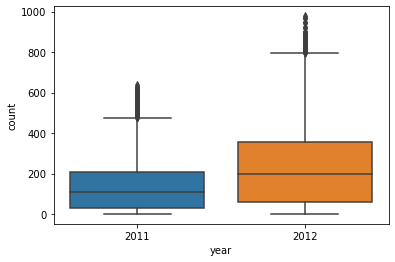

In [28]:
# 년도별 count boxplot
sns.boxplot(x='year',y='count', data=train)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

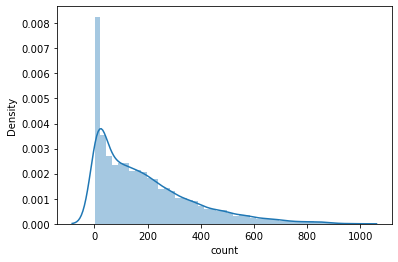

In [29]:
# count 분포
sns.distplot(train['count'])

<AxesSubplot:xlabel='hour', ylabel='count'>

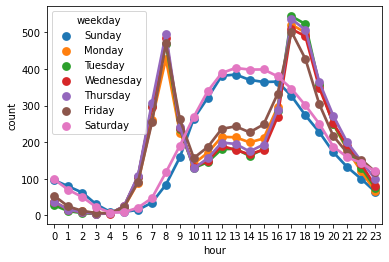

In [30]:
# 요일별 시간 그래프
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
hourAggregated = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated)

<AxesSubplot:xlabel='hour', ylabel='count'>

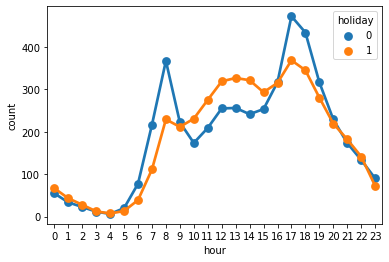

In [31]:
# 휴일 유무에 따른 시간 분포
hourAggregated = pd.DataFrame(train.groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["holiday"], data=hourAggregated)

<AxesSubplot:xlabel='hour', ylabel='count'>

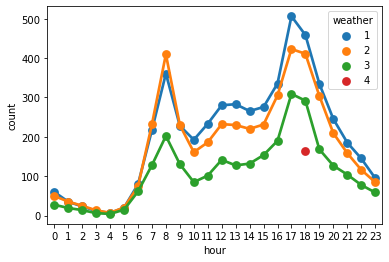

In [32]:
# 날씨별 시간 분포
hourAggregated = pd.DataFrame(train.groupby(["hour","weather"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weather"], data=hourAggregated)

<AxesSubplot:xlabel='month', ylabel='count'>

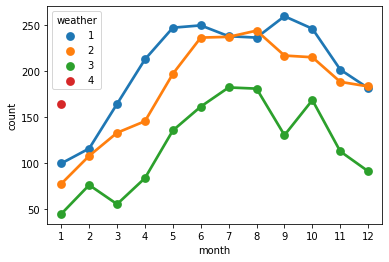

In [33]:
# 날씨별 월 분포
hourAggregated = pd.DataFrame(train.groupby(["month","weather"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["month"], y=hourAggregated["count"],hue=hourAggregated["weather"], data=hourAggregated)

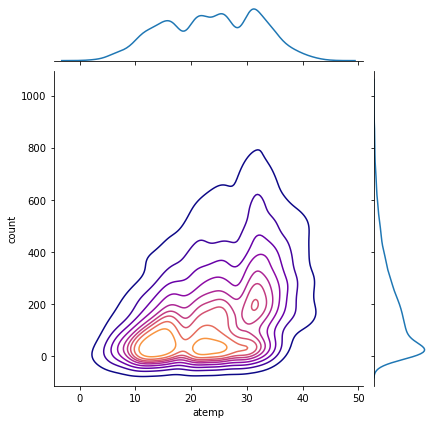

In [34]:
# 체감온도에 따른 분포
sns.jointplot(x = 'atemp', y = 'count', data = train, kind = 'kde', cmap = 'plasma')

<AxesSubplot:xlabel='hour', ylabel='registered'>

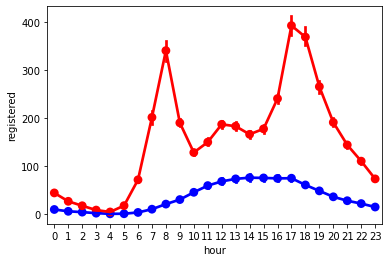

In [42]:
# 등록, 미등록 회원별 시간 분포
sns.pointplot(x = 'hour', y = 'casual', data = train, estimator = np.average, color = 'blue')
sns.pointplot(x = 'hour', y = 'registered', data = train, estimator = np.average, color = 'red')

In [45]:
# workingday + 출퇴근시간 파생변수 만들기
train['commute'] = np.where(((train['hour']>6)&(train['hour']<9)|(train['hour']>16)&(train['hour']<19))&(train['workingday']==1),1,0)
train['commute']

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: commute, Length: 10886, dtype: int32

<AxesSubplot:xlabel='commute', ylabel='count'>

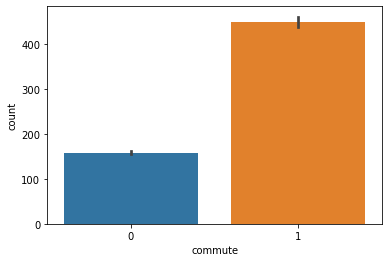

In [50]:
# 출퇴근시간 count 그래프
sns.barplot(x=train['commute'],y=train['count'])

<AxesSubplot:xlabel='commute', ylabel='registered'>

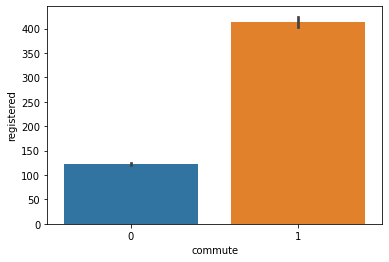

In [51]:
# 출퇴근시간 registered 그래프
sns.barplot(x=train['commute'],y=train['registered'])

<AxesSubplot:xlabel='commute', ylabel='casual'>

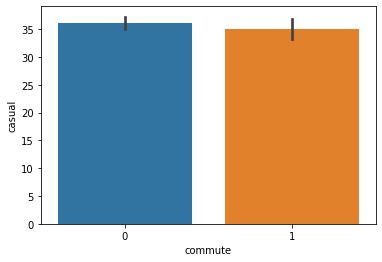

In [52]:
# 출퇴근시간 casual 그래프
sns.barplot(x=train['commute'],y=train['casual'])